In [3]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')


Question 1
Load the energy data from the file assets/Energy Indicators.xls, which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013, and should be put into a DataFrame with the variable name of Energy.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]

Convert Energy Supply to gigajoules (Note: there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

Rename the following list of countries (for use in later questions):

"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g. 'Bolivia (Plurinational State of)' should be 'Bolivia'. 'Switzerland17' should be 'Switzerland'.

Next, load the GDP data from the file assets/world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.

Make sure to skip the header, and rename the following list of countries:

"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"

Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file assets/scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".

In [4]:
def answer_one():
    # YOUR CODE HERE
    import pandas as pd
    import numpy as np
    Energy = pd.read_excel('assets/Energy Indicators.xls')
    Energy = Energy[17:246]
    Energy.drop(['Unnamed: 0','Unnamed: 1'], axis = 1, inplace = True)
    Energy.rename(columns={'Unnamed: 2': 'Country', 'Unnamed: 3': 'Energy Supply',
                           'Unnamed: 4': 'Energy Supply per Capita', 'Unnamed: 5': '% Renewable'}, inplace=True)
    Energy.replace(r'^\s*$', np.nan, regex = True)
    Energy["Energy Supply"] = 1000000 * Energy["Energy Supply"]
    Energy.drop([244,245], axis = 0, inplace = True)
    Energy['Country'] = Energy['Country'].str.strip('1234567890')
    Energy['Country'].replace(r' \(.*\)', '', regex= True, inplace = True)
    Energy.replace(to_replace="Republic of Korea", value="South Korea", inplace=True)
    Energy.replace(to_replace="United States of America", value="United States", inplace=True)
    Energy.replace(to_replace="United Kingdom of Great Britain and Northern Ireland", value="United Kingdom", inplace=True)    
    Energy.replace(to_replace="China, Hong Kong Special Administrative Region", value="Hong Kong", inplace=True)
    
    GDP = pd.read_csv('assets/world_bank.csv', skiprows = 4)
    GDP.replace(to_replace="Korea, Rep.", value="South Korea", inplace=True)
    GDP.replace(to_replace="Iran, Islamic Rep.", value="Iran", inplace=True)
    GDP.replace(to_replace="Hong Kong SAR, China", value="Hong Kong", inplace=True)
    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.rename(columns={'Country Name':'Country'},inplace = True)

    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn = ScimEn[:15]
    
    new_df = pd.merge(ScimEn,Energy,how='inner',left_on='Country',right_on='Country')
    final_df = pd.merge(new_df,GDP,how='inner',left_on='Country',right_on='Country')
    final_df = final_df.set_index('Country')
    return final_df
    
    #raise NotImplementedError()

In [5]:
print(answer_one())

                    Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
France                 9      13153              12973     130632   
South Korea           10      11983              11923     114675   
Italy                 11      10964              10794     111850   
Spain                 12       9428               9330     123336   
Iran                  13       889

Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

This function should return a single number.


In [4]:
def answer_two():
    # YOUR CODE HERE
    import pandas as pd
    import numpy as np
    Energy = pd.read_excel('assets/Energy Indicators.xls')
    Energy = Energy[17:246]
    Energy.drop(['Unnamed: 0','Unnamed: 1'], axis = 1, inplace = True)
    Energy.rename(columns={'Unnamed: 2': 'Country', 'Unnamed: 3': 'Energy Supply',
                           'Unnamed: 4': 'Energy Supply per Capita', 'Unnamed: 5': '% Renewable'}, inplace=True)
    Energy.replace(r'^\s*$', np.nan, regex = True)
    Energy["Energy Supply"] = 1000000 * Energy["Energy Supply"]
    Energy.drop([244,245], axis = 0, inplace = True)
    Energy['Country'] = Energy['Country'].str.strip('1234567890')
    Energy['Country'].replace(r' \(.*\)', '', regex= True, inplace = True)
    Energy.replace(to_replace="Republic of Korea", value="South Korea", inplace=True)
    Energy.replace(to_replace="United States of America", value="United States", inplace=True)
    Energy.replace(to_replace="United Kingdom of Great Britain and Northern Ireland", value="United Kingdom", inplace=True)    
    Energy.replace(to_replace="China, Hong Kong Special Administrative Region", value="Hong Kong", inplace=True)
    
    GDP = pd.read_csv('assets/world_bank.csv', skiprows = 4)
    GDP.replace(to_replace="Korea, Rep.", value="South Korea", inplace=True)
    GDP.replace(to_replace="Iran, Islamic Rep.", value="Iran", inplace=True)
    GDP.replace(to_replace="Hong Kong SAR, China", value="Hong Kong", inplace=True)
    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.rename(columns={'Country Name':'Country'},inplace = True)

    ScimEn = pd.read_excel('assets/scimagojr-3.xlsx')
    #ScimEn = ScimEn[:15]
    
    new_df = pd.merge(ScimEn,Energy,how='inner',left_on='Country',right_on='Country')
    final_df = pd.merge(new_df,GDP,how='inner',left_on='Country',right_on='Country')
    final_df = final_df.set_index('Country')
    
    df = pd.concat([ScimEn,Energy,GDP])['Country'].unique()
    return (len(df) - len(final_df))  

    #raise NotImplementedError()

In [5]:
print(answer_two())

156


Question 3¶
What are the top 15 countries for average GDP over the last 10 years?

This function should return a Series named avgGDP with 15 countries and their average GDP sorted in descending order

In [6]:
def answer_three():
    # YOUR CODE HERE
    import pandas as pd
    import numpy as np
    new_df = answer_one()
    new_df = new_df.iloc[:,10:]
    avgGDP = new_df.mean(axis=1)
    return avgGDP.sort_values(ascending = False)
    
    #raise NotImplementedError()

In [7]:
print(answer_three())

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64


Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

This function should return a single number.


In [8]:
def answer_four():
    # YOUR CODE HERE
    import pandas as pd
    import numpy as np
    country = answer_three()
    new_df = answer_one()
    country_name = country[country == country[5]].index[0]
    get_val = new_df.loc[country_name]['2015'] - new_df.loc[country_name]['2006']
    return get_val
    
    #raise NotImplementedError()

In [9]:
print(answer_four())

246702696075.3999


Question 5
What is the mean energy supply per capita?

This function should return a single number.



In [10]:
def answer_five():
    # YOUR CODE HERE
    import pandas as pd
    import numpy as np
    new_df = answer_one()
    get_mean = new_df['Energy Supply per Capita'].mean()
    return get_mean
    
    #raise NotImplementedError()

In [11]:
print(answer_five())

157.6


Question 6
What country has the maximum % Renewable and what is the percentage?

This function should return a tuple with the name of the country and the percentage.



In [12]:
def answer_six():
    # YOUR CODE HERE
    import pandas as pd
    import numpy as np
    new_df = answer_one()
    get_max = new_df['% Renewable'].max()
    country_name = new_df[new_df['% Renewable']==get_max].index[0]
    new_tuple = (country_name,get_max)
    return new_tuple
    #raise NotImplementedError()

In [13]:
print(answer_six())

('Brazil', 69.64803)


Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

This function should return a tuple with the name of the country and the ratio.



In [14]:
def answer_seven():
    # YOUR CODE HERE
    import pandas as pd
    import numpy as np
    new_df = answer_one()
    new_df['Ratio'] = new_df['Self-citations']/new_df['Citations']
    get_max = new_df['Ratio'].max()
    country_name = new_df[new_df['Ratio']==get_max].index[0]
    new_tuple = (country_name,get_max)
    
    return new_tuple
    
    #raise NotImplementedError()

In [15]:
print(answer_seven())

('China', 0.6893126179389422)


Question 8
Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?

This function should return the name of the country



In [16]:
def answer_eight():
    # YOUR CODE HERE
    import pandas as pd
    import numpy as np
    new_df = answer_one()
    new_df['Population'] = new_df['Energy Supply']/new_df['Energy Supply per Capita']
    get_val = new_df['Population'].sort_values(ascending = False)[2]
    country_name = new_df[new_df['Population']==get_val].index[0]
    return country_name
    #raise NotImplementedError()

In [17]:
print(answer_eight())

United States


Question 9
Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the .corr() method, (Pearson's correlation).

This function should return a single number.

(Optional: Use the built-in function plot9() to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)



In [18]:
def answer_nine():
    # YOUR CODE HERE
    import pandas as pd
    import scipy.stats as stats
    import numpy as np
    new_df = answer_one()
    new_df['Population'] = new_df['Energy Supply']/new_df['Energy Supply per Capita']
    new_df['Citable docs per Capita'] = new_df['Citable documents'] / new_df['Population']
        
    new_df['Citable docs per Capita'] = new_df['Citable docs per Capita'].astype(float)
    new_df['Energy Supply per Capita'] = new_df['Energy Supply per Capita'].astype(float)
    corr2 = new_df['Citable docs per Capita'].corr(new_df['Energy Supply per Capita'])
    return corr2
    
    #raise NotImplementedError()

In [19]:
print(answer_nine())

0.7940010435442946


In [20]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    import pandas as pd
    import scipy.stats as stats
    import numpy as np
    new_df = answer_one()
    new_df['Population'] = new_df['Energy Supply']/new_df['Energy Supply per Capita']
    new_df['Citable docs per Capita'] = new_df['Citable documents'] / new_df['Population']
    new_df.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
    return

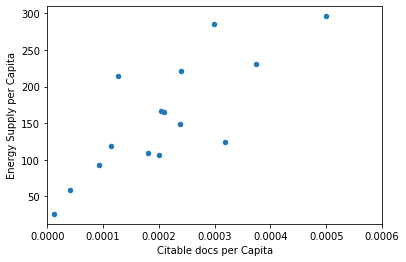

In [21]:
plot9()

Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

This function should return a series named HighRenew whose index is the country name sorted in ascending order of rank.



In [22]:
def answer_ten():
    # YOUR CODE HERE
    import pandas as pd
    import numpy as np
    new_df = answer_one()
    get_median = new_df['% Renewable'].median()
    new_df['Renewable Median'] = [1 if median_value >= get_median
                                 else 0 for median_value in new_df['% Renewable']]
    return new_df['Renewable Median']    
    #raise NotImplementedError()

In [23]:
print(answer_ten())

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Median, dtype: int64


Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
This function should return a DataFrame with index named Continent ['Asia', 'Australia', 'Europe', 'North America', 'South America'] and columns ['size', 'sum', 'mean', 'std']



In [14]:
def answer_eleven():
    # YOUR CODE HERE
    import pandas as pd
    import numpy as np
    new_df = answer_one()
    ContinentDict = {'China':'Asia',
                     'United States':'North America',
                     'Japan':'Asia', 
                     'United Kingdom':'Europe',
                     'Russian Federation':'Europe',
                     'Canada':'North America',
                     'Germany':'Europe',
                     'India':'Asia',
                     'France':'Europe',
                     'South Korea':'Asia',
                     'Italy':'Europe',
                     'Spain':'Europe',
                     'Iran':'Asia',
                     'Australia':'Australia',
                     'Brazil':'South America'}
    
    new_df['Continent']= new_df.index.to_series().map(ContinentDict)
    
    new_df['Population']= (new_df['Energy Supply']/new_df['Energy Supply per Capita']).astype(float)
    result = new_df
    result['size'] = 0
    result['sum'] = 0
    result['mean'] = 0
    result['std'] = 0
    #print(result.columns)
    result = new_df.set_index('Continent').groupby('Continent')['Population'].agg({'size':np.size,'sum':np.sum,'mean':np.mean,'std':np.std})
    print(result)
    return result
    #raise NotImplementedError()

In [15]:
print(answer_eleven())

SpecificationError: nested renamer is not supported

Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

This function should return a Series with a MultiIndex of Continent, then the bins for % Renewable. Do not include groups with no countries.



In [43]:
def answer_twelve():
    # YOUR CODE HERE
    import pandas as pd
    import numpy as np
    new_df = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    new_df = new_df.reset_index()
    new_df['Continent'] = [ContinentDict[country] for country in new_df['Country']]
    new_df['% Renewable'] = pd.cut(new_df['% Renewable'],5)
    return new_df.groupby(['Continent','% Renewable']).size()

    #raise NotImplementedError()

In [44]:
print(answer_twelve())

Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
dtype: int64


Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

This function should return a series PopEst whose index is the country name and whose values are the population estimate string



In [10]:
def answer_thirteen():
    # YOUR CODE HERE
    import pandas as pd
    new_df = answer_one()
    new_df['Population']= (new_df['Energy Supply']/new_df['Energy Supply per Capita'])
    
    return new_df['Population'].apply(lambda x: '{:,}'.format(x)).astype(str)
    
    #raise NotImplementedError()

In [11]:
print(answer_thirteen())

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: Population, dtype: object


Optional
Use the built in function plot_optional() to see an example visualization.

In [ ]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);
    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')
    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [ ]:
plot_optional()